<h2>Lecture 2 - Outline</h2>

<ul>
    <li>Machine Learning Steps</li>
    <li>The first questions to ask</li>
    <li>Data management, loading, cleaning and Preprocessing</li>
    <li>Exploratory Data Analysis (EDA)</li>
    <li>Feature Selection and engineering</li>
    <li>Model Training and Evaluation</li>
    <li>Hyperparameter tuning</li>
</ul>

<p>Below are some crucial steps to take and consider as a ML engineer. These steps are from the book, Hands-on Machine Learning with Scikit-learn and Tensorflow (Great book! You should check it out)</p>

<ul>
    <li>Look at the big picture and Frame the Problem</li>
    <li>Get the data</li>
    <li>Discover and visualize the data to gain insights</li>
    <li>Prepare the data for machine learning algorithms</li>
    <li>Select a model and train it</li>
    <li>Fine-tune your model</li>
    <li>Present your solution</li>
    <li>Launch, monitor, and maintain your system</li>
</ul>

<h3>First Questions (Looking at the Big Picture)</h3>

<p>As a machine learning engineer, there will always be a business objective and how your solution will be used? Here are some few things you wanna consider.</p>

<ul>
    <li>What are the current solutions/workarounds (if any)?</li>
    <li>How should you frame this problem (supervised/unsupervised)?</li>
    <li>How should performance be measured?<\li>
    <li>What would be the minimum performance needed to reach the business objective?</li>
    <li>List your assumptions</li>
</ul>
        
<p>We will be working with the titanic dataset for the first half of this class. We will assume that we are a machine learning engineer called in by 'Big Ship Manufacturing firm' and they are interested in the titanic wreck so as to learn from it and build ships. They understand that natural disasters are inevitable but they would like to know what factors contributed to the survival of some so as to increase the chances of others next time.</p>
    
<p>So we are interested in factors that contributed to survival. Here the company is not so much interested in prediction but rather inference. In inference, we are interested in the relationship between the response and its predictors. Hence, learning to define business objectives will tell you if you are interested in inference or prediction or both.</p>

<h3>All Things Data</h3>

<p>Now, we have our data. And we understand that our dataset is labeled so we can frame our problem as a supervised learning problem, if we are interested in inference. When it comes to our data, the preliminary stages involve a lot of exploration.  Here are things we do.</p>

<ul>
    <li>Convert all variables to numeric</li>
    <li>Check for missing values and handle them</li>
    <li>Handle outliers</li>
</ul>

<li>These processes are summed under the topic DATA CLEANING. Some put cleaning before EDA while some after EDA. It all depends on you.</li>

<p><strong>Loading in our data</strong></p>

In [1]:
# Some very important libraries. Pandas for data manipulation; Numpy for array manipulation; Seaborn and matplotlib for plots.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style('whitegrid')

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [3]:
pwd

'E:\\Intermediate'

In [4]:
# We load our data using pandas
df = pd.read_csv('train.csv', index_col='PassengerId')

In [5]:
# Show the first ten rows of the data
df.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
# Check the shape of the dataset. This tells you the number of rows(observations. In this case, passengers) and columns(features)
df.shape

(891, 11)

<p><strong>Checking for missing values.</strong></p>

<p>Missing values could be missing at random(MAR) or not missing at random(NMAR). Always put this mind. When checking for missing values, do a general check and then individual check. Be sure to check the percentage of missing values. It is almost impossible to get useful information when we have 35% - 50% missing values in a column.</p>


In [7]:
# Do a general check of missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Check percentage of missing values in age. Just 20% are misssing
df['Age'].isnull().value_counts()/len(df)

False    0.801347
True     0.198653
Name: Age, dtype: float64

In [9]:
# About 77% of values in Cabin are missing
df['Cabin'].isnull().value_counts()/len(df)

True     0.771044
False    0.228956
Name: Cabin, dtype: float64

In [10]:
df['Embarked'].isnull().value_counts()/len(df)

False    0.997755
True     0.002245
Name: Embarked, dtype: float64

<p>We have missing values in Age, cabin and embarked columns. The percentages are pretty decent except for Cabin, we have 77% missing values. We deal with the Cabin column by removing it completely and we assume that other columns have their values missing at random. For categorical features, we will supply missing values using mode and for continuous features, we will supply with median(this is because it is immune to outliers).</p>

In [11]:
# Drop Cabin column because of too many missing values
df.drop(columns='Cabin', inplace=True)

In [12]:
# We can see that cabin is gone.
df.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [13]:
# Check the value_counts of Embarked before dealing with missing values
df.Embarked.value_counts()/len(df)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [14]:
df['Embarked'].mode()

0    S
dtype: object

In [15]:
# Replace missing values in embarked with the mode, in this case S.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
# Replace missing values in age with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
df['Age'].median()

28.0

In [18]:
# Check for missing values again
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<h3>CREATE A TEST SET</h3>

<img src="train-test-split.png" alt="">

<p>It is good practice to always create a test set very early before you begin analysis. The reason for this is to avoid bias. Including all your dataset in analysis to make your model prone to overfitting(it is going to do well on your training set but bad on test set).</p>

<p>There are two major ways we can create a train-test split depending how balanced our dataset is. Bias is a serious problem in machine learning so you wanna reduce it as much as possible.</p>

<p><strong>Illustrating Data Imbalance</strong></p>

In [19]:
# Check the class percentages. Class 0 - Not survived. class 1 - Survived.
df['Survived'].value_counts()/len(df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<p>62% did not survive while 38% survived. If we split our dataset randomly without taking into account this distribution, we will introduce further bias into our dataset and we don't want. We want to always preserve this imbalance in our training and test set.</p>

<p><strong>Train-Test Split using random sampling vs Train-Test using Stratified Sampling</strong></p>

In [20]:
# Sklearn module for splitting dataset
from sklearn.model_selection import train_test_split

In [21]:
# train-test split using random sampling
train1, test1 = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
# Check if distribution is preserved
train1['Survived'].value_counts()/len(train1)

0    0.623596
1    0.376404
Name: Survived, dtype: float64

In [23]:
test1['Survived'].value_counts()/len(test1)

0    0.586592
1    0.413408
Name: Survived, dtype: float64

In [24]:
# train-test split using Stratified random sampling
train2, test2 = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Survived'], shuffle=True)

In [25]:
train2['Survived'].value_counts()/len(train2)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [26]:
test2['Survived'].value_counts()/len(test2)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

<p>Stratified sampling gives us the best split by preserving the dataset distribution and bias.</p>

<h3>EXPLORATORY DATA ANALYSIS</h3>

<h3>Why visualization and Exploratory Data Analysis</h3>

<p>Visualization is a key first step in the exploration of most datasets. Visualization + summary statistics = EDA. We can also call this Descriptive Statistics. In descriptive statistics, we are very much interested in the underlying distributions of the features and also the process of uncertainty involved.</p>

<p>As a general rule, you should never start creating analytical or machine learning models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly.</p>

<p>Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. This makes visualization an end in itself (You might wanna check out business analytics and softwares such as tableau and PowerBI)</p>

<p>Five main stages of EDA</p>

<ul>
    <li>Research</li>
    <li>Organizing and summarizing the data. We have graphical summaries and numerical summaries</li>
    <li>Looking for important features and patterns (We might perform feature engineering and selection at this stage)</li>
    <li>Looking for exceptions</li>
    <li>Interpreting these findings in the context of the research question.</li>
</ul>

<p>Conclusions drawn from EDA constitute the first part of our <strong>Data Report</strong></p>

<h3>What are we looking for at this point?</h3>

<p>We have basically two kinds of visualization segments: Univariate and Bivariate analysis</p>
<p>Univariate Analysis - You must look at each variable in your dataset individually using the appropriate plot.</p>

<ul>
    <li>Continuous Features - we are interested in shapes, center and spread(standard deviation)</li>
    <li>Categorical Features - Mode, bar chart and frequency distribution</li>
</ul>

<p>Bivariate Analysis</p>

<ul>
    <li>Continuous - Categorical: Bar graph with factorplot(seaborn)</li>
    <li>Continuous - Continuous: Scatterplot with regplot(seaborn)</li>
    <li>Categorical - categorical: Bivariate analysis is almost nonsensical in the context of categorical variable but pandas groupby function allows us to make sense out of it.</li>
</ul>

<h3>Resources</h3>

<p><a href="https://realpython.com/python-matplotlib-guide/">Realpython tutorial on matplotlib</a> is a good place to start. Also check out <a href="https://www.youtube.com/watch?v=KvZ2KSxlWBY">Stephen Elston's famous tutorial</a></p>

In [27]:
# Before visualization and exploration, always make a copy of your dataset
train_copy = train2.copy()

<p>We will start with Univariate Analysis</p>

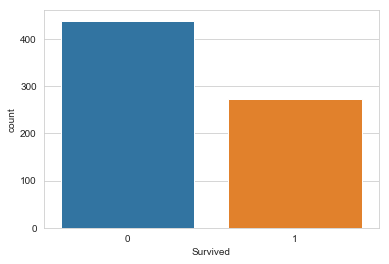

In [28]:
sns.countplot(x="Survived", data=train_copy)

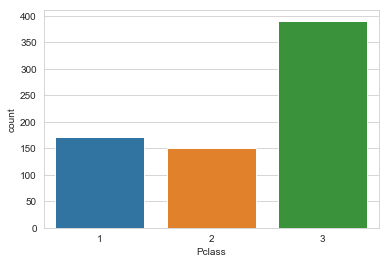

In [29]:
# Pclass distribution
sns.countplot(x='Pclass', data=train_copy)

In [30]:
# Checking the percentage of Pclass
train_copy['Pclass'].value_counts()/len(train_copy)

3    0.549157
1    0.240169
2    0.210674
Name: Pclass, dtype: float64

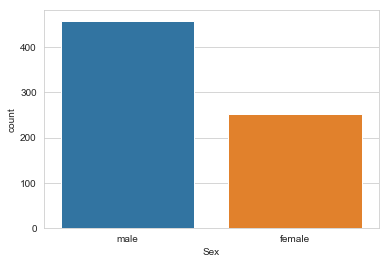

In [31]:
# Sex
sns.countplot(x='Sex', data=train_copy)

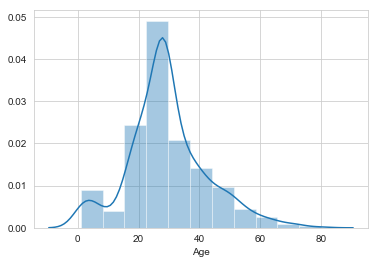

In [57]:
# Age distribution
sns.distplot(train_copy['Age'], bins=11)

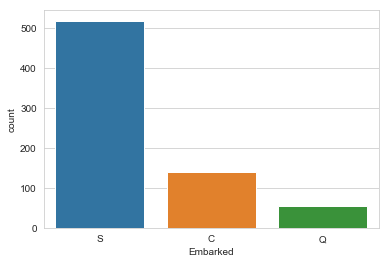

In [33]:
sns.countplot(x='Embarked', data=train_copy)
# Most folks joined from southampton

<p><strong>Bivariate Analysis</strong></p>

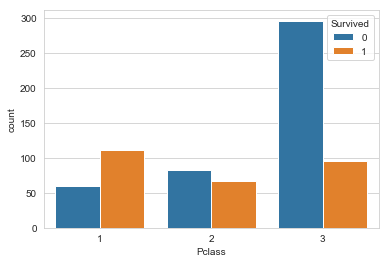

In [34]:
# Check survival per class.
sns.countplot(x='Pclass', data=train_copy, hue='Survived')

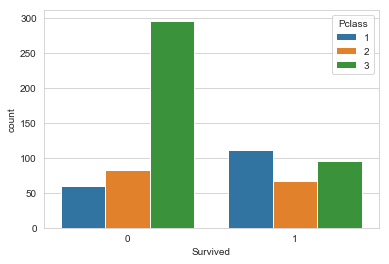

In [58]:
sns.countplot(x="Survived", data=train_copy, hue="Pclass")

In [35]:
train_copy.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           111
        0            60
2       0            83
        1            67
3       0           296
        1            95
Name: Survived, dtype: int64

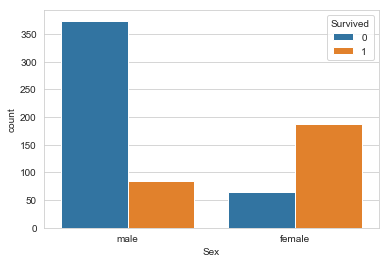

In [36]:
# Check sex that is likely to survive
sns.countplot(x='Sex', data=train_copy, hue='Survived')

In [62]:
train_copy.groupby('Sex')['Survived'].value_counts()

KeyError: 'Column not found: Sex'

In [63]:
sns.countplot(x='Survived', data=train_copy, hue="Sex")

,Survived,Pclass,Age,Fare,class_1,class_2,Sex_female,with family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
693,1,3,28,57,0,0,0,0,0,0,1
482,0,2,28,0,0,1,0,0,0,0,1
528,0,1,28,222,1,0,0,0,0,0,1
856,1,3,18,10,0,0,1,1,0,0,1
802,1,2,31,27,0,1,1,1,0,0,1


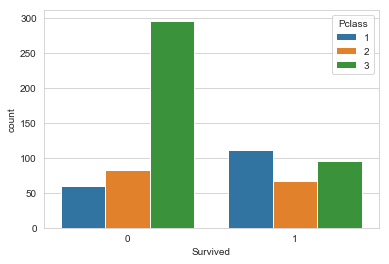

In [37]:
# Check survival by class
sns.countplot(x='Survived', data=train_copy, hue='Pclass')

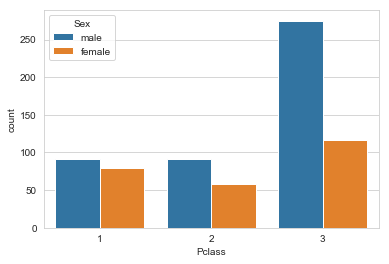

In [38]:
# Check sex by class
sns.countplot(x='Pclass', data=train_copy, hue='Sex')

<p>A little bit of feature engineering. We are going to create a new feature called 'Alone'</p>

In [39]:
# Create a feature that tells if person was with family or alone
train_copy['Alone'] = train_copy['SibSp'] + train_copy['Parch']

In [40]:
# if Alone value is >0 then they are with family else they are alone
train_copy['Alone'].loc[train_copy['Alone'] > 0] = 'with family'
train_copy['Alone'].loc[train_copy['Alone'] == 0] = 'without family'

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
train_copy.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
PassengerId,,,,,,,,,,,
693,1,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,S,without family
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0000,S,without family
528,0,1,"Farthing, Mr. John",male,28.0,0,0,PC 17483,221.7792,S,without family
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S,with family
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S,with family
653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,S,without family
510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S,without family
558,0,1,"Robbins, Mr. Victor",male,28.0,0,0,PC 17757,227.5250,C,without family
829,1,3,"McCormack, Mr. Thomas Joseph",male,28.0,0,0,367228,7.7500,Q,without family


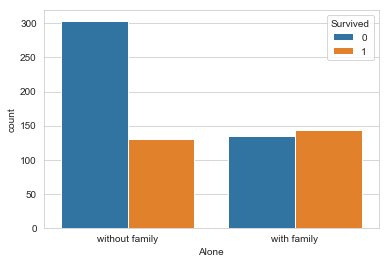

In [42]:
# What are the chances of surviving if you are alone?

sns.countplot(x='Alone', data=train_copy, hue='Survived')

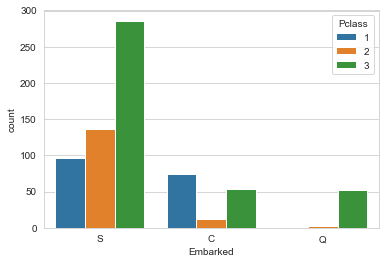

In [43]:
sns.countplot(x='Embarked', data=train_copy, hue='Pclass')

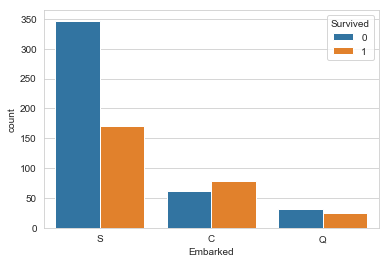

In [44]:
# Always think about size effect.
sns.countplot(x='Embarked', data=train_copy, hue='Survived')

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


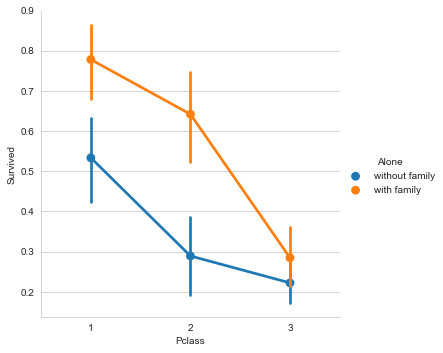

In [45]:
sns.factorplot('Pclass', 'Survived', data=train_copy, hue='Alone')

<p>Always write down your findings and whatever pattern you noted from your EDA.</p>

<h3>Some Notes on Inferential Statistics</h3>

<p>It is always good to make a stop at inferential statistics before machine learning. At the end of the day, what really matters is being able to draw insights from data. Inferential statistics give you the tools to infer properties of a population from a sample</p>

<p>Some important steps</p>

<ul>
    <li>Define the null and alternate hypothesis</li>
    <li>Choose sample</li>
    <li>Analyse Evidence</li>
    <li>Interpret Results</li>
</ul>

<p>Some questions inferential statistics help you answer are:</p>

<ul>
    <li>Is there a relationship between the response and at least one predictor? (Correlation, ANOVA, contigency table)</li>
    <li>How strong is this relationship</li>
    <li>How much of the data is explained by current predictors?</li>
</ul>

<p>Being able to answer these questions give you a better chance at machine learning modeling</p>

<h3>Feature Engineering</h3>

<p>Under Feature Engineering, we try to achieve the following</p>

<ul>
    <li>Convert all non-numerics to numeric (one-hot encoding or label encoding)</li>
    <li>Standardization and Normalization of data especially continuous features</li>
    <li>Accounting for interaction between features by multiplication or addition</li>
</ul>

In [46]:
# Create dummies for cat variables
pclass_dummies = pd.get_dummies(data=train_copy['Pclass'], prefix='class')
gender_dummies = pd.get_dummies(data=train_copy['Sex'], prefix='Sex')
alone_dummies = pd.get_dummies(data=train_copy['Alone'])
embarked_dummies = pd.get_dummies(data=train_copy['Embarked'], prefix='Embarked')

In [64]:
gender_dummies.head(n=10)

,Sex_female,Sex_male
PassengerId,,
693,0,1
482,0,1
528,0,1
856,1,0
802,1,0
653,0,1
510,0,1
558,0,1
829,0,1


In [65]:
alone_dummies.head()

,with family,without family
PassengerId,,
693,0,1
482,0,1
528,0,1
856,1,0
802,1,0


In [48]:
# Check the one-hot encoding for pclass
pclass_dummies.head(n=10)

,class_1,class_2,class_3
PassengerId,,,
693,0,0,1
482,0,1,0
528,1,0,0
856,0,0,1
802,0,1,0
653,0,0,1
510,0,0,1
558,1,0,0
829,0,0,1


In [51]:
# Approximations to Age and Fare

import math

train_copy['Age'] = train_copy['Age'].apply(math.ceil)
train_copy['Fare'] = train_copy['Fare'].apply(math.ceil)

In [52]:
# Join the new dummy dataframes with the train_copy dataframe
train_copy = pd.concat([train_copy, pclass_dummies, gender_dummies, alone_dummies, embarked_dummies], axis=1)

In [53]:
# Lets see what our dataframe looks like
train_copy.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,class_1,class_2,class_3,Sex_female,Sex_male,with family,without family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
693,1,3,"Lam, Mr. Ali",male,28,0,0,1601,57,S,...,0,0,1,0,1,0,1,0,0,1
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28,0,0,239854,0,S,...,0,1,0,0,1,0,1,0,0,1
528,0,1,"Farthing, Mr. John",male,28,0,0,PC 17483,222,S,...,1,0,0,0,1,0,1,0,0,1
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18,0,1,392091,10,S,...,0,0,1,1,0,1,0,0,0,1
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31,1,1,C.A. 31921,27,S,...,0,1,0,1,0,1,0,0,0,1
653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21,0,0,8475,9,S,...,0,0,1,0,1,0,1,0,0,1
510,1,3,"Lang, Mr. Fang",male,26,0,0,1601,57,S,...,0,0,1,0,1,0,1,0,0,1
558,0,1,"Robbins, Mr. Victor",male,28,0,0,PC 17757,228,C,...,1,0,0,0,1,0,1,1,0,0
829,1,3,"McCormack, Mr. Thomas Joseph",male,28,0,0,367228,8,Q,...,0,0,1,0,1,0,1,0,1,0


In [54]:
# We are dropping the columns we don't need
train_copy.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Alone', 'Embarked', 'Sex', 'class_3', 'without family', 'Sex_male'], inplace=True)

In [ ]:
columns_dropped = train_copy[['Name', 'SibSp', 'Parch', 'Ticket']]

In [55]:
# Our new dataframe
train_copy.head(n=10)

,Survived,Pclass,Age,Fare,class_1,class_2,Sex_female,with family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
693,1,3,28,57,0,0,0,0,0,0,1
482,0,2,28,0,0,1,0,0,0,0,1
528,0,1,28,222,1,0,0,0,0,0,1
856,1,3,18,10,0,0,1,1,0,0,1
802,1,2,31,27,0,1,1,1,0,0,1
653,0,3,21,9,0,0,0,0,0,0,1
510,1,3,26,57,0,0,0,0,0,0,1
558,0,1,28,228,1,0,0,0,1,0,0
829,1,3,28,8,0,0,0,0,0,1,0


<h3>Model Training and Evaluation</h3>

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [67]:
y = train_copy['Survived']

X = train_copy.drop(columns='Survived')

In [68]:
X.head()

,Pclass,Age,Fare,class_1,class_2,Sex_female,with family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
693,3,28,57,0,0,0,0,0,0,1
482,2,28,0,0,1,0,0,0,0,1
528,1,28,222,1,0,0,0,0,0,1
856,3,18,10,0,0,1,1,0,0,1
802,2,31,27,0,1,1,1,0,0,1


In [69]:
log_reg = LogisticRegression()

In [70]:
accuracy = cross_val_score(estimator=log_reg, X=X, y=y, cv=10, scoring='accuracy')

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appda

In [72]:
accuracy.mean()

0.7950637156270959